[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/takumi-saka-mo/DEVIRSIFY_Analysis/blob/main/notebooks/ソフトバンクvs楽天.ipynb)

# ソフトバンク株式会社 vs 楽天グループ株式会社

ソフトバンク株式会社...移動通信サービスの提供、携帯端末の販売、固定通信サービスの提供、インターネット接続サービスの提供<br>
楽天グループ株式会社...ECサイト, インベストメント, フィンテック<br>

In [ ]:
# calculate_EXVAL ディレクトリに格納されているクラスをインストール
! pip install git+https://github.com/takumi-saka-mo/DEVIRSIFY_Analysis.git
from calculate_EXVAL import DiversifyApproach
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## ソフトバンク株式会社

**財務データ参照先**<br>
https://www.softbank.jp/corp/set/data/ir/documents/financial_reports/fy2023/pdf/sbkk_financial_report_20240509.pdf


In [7]:
# ソフトバンク株式会社の必要データを準備
softbank_data = pd.read_csv(
    "https://raw.githubusercontent.com/takumi-saka-mo/DEVIRSIFY_Analysis/main/data/Softbank_category.csv",
    encoding = "UTF-8"
    ).set_index("Category")


softbank_data

,Consumer,Enterprise,Distribution,Media,Finance
Category,,,,,
Sales,280132,763194,569076,1586072,215987


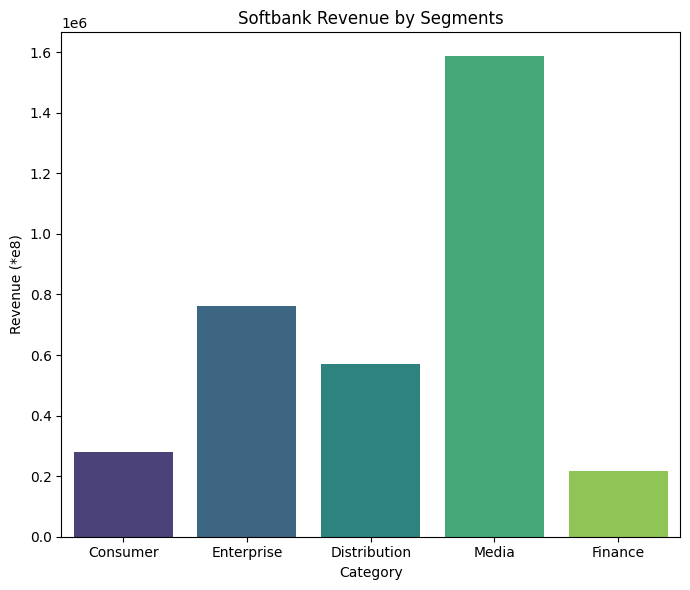

In [8]:
df = softbank_data.T.reset_index()
df.columns = ["Category", "Sales"]
plt.figure(figsize=(7, 6))
sns.barplot(data = df, x = "Category", y = "Sales", hue = "Category",  palette = "viridis")
plt.title("Softbank Revenue by Segments")
plt.ylabel("Revenue (*e8)")
plt.xlabel("Category")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### セグメント分類について
**参照**
<br>https://group.softbank/system/files/pdf/ir/financials/annual_reports/financial-report_fy2024_ja.pdf
- コンシューマ<br>
(a) モバイルサービス及び携帯端末の販売<br>
(b)ブロードバンドサービス<br>
(c)でんき<br>
- エンタープライズ<br>
(a) モバイルサービス及び携帯端末レンタルサービス<br>
(b)固定通信サービス(音声伝送サービスおよびデータ伝送サービス)<br>
(c)ソリューション等(データセンター、クラウド、セキュリティ、グローバル、AI、IoT、機器販売)<br>
- ディストリビューション<br>
法人顧客向けのICT、クラウド、IoTソリューション等に対応したハードウエア、ソフトウエア、サービスなどの商材、個人顧客向けのモバイルアクセサリー、PCソフトウエア、IoTプロダクト等の商材の販売
- メディア・EC<br>
(a) メディア(検索広告、アカウント広告、ディスプレイ広告の収入)<br>
(b)コマース(アスクルグループの物品販売サービス、「ZOZOTOWN」や「 Yahoo!オークション」等のEC関連サービスの収入)<br>
- ファイナンス<br>
主にQRコードによる代金決済サービスの提供により生じる加盟店手数料


In [13]:
# セグメント値の設定
seg1_value = softbank_data["Consumer"].iloc[0] * 1e6 # 単位 : 百万円
seg2_value = softbank_data["Enterprise"].iloc[0] * 1e6
seg3_value = softbank_data["Distribution"].iloc[0] * 1e6
seg4_value = softbank_data["Media"].iloc[0] * 1e6
seg5_value = softbank_data["Finance"].iloc[0] * 1e6

seg_list = [seg1_value, seg2_value, seg3_value, seg4_value, seg5_value]

# 専業企業リスト
Consumer = [
    "9432.T",  # NTT
    "9433.T",  # KDDI
    "9437.T",  # 楽天G
    "3844.T",  # コムシード(格安SIM)
    "9424.T",  # 日本通信(格安SIM)
    "9501.T",  # 東京電力HD
    "9503.T",  # 関西電力
    "9513.T",  # J-Power
    "3659.T",  # ネクソン(ブロードバンド)
    "3774.T"   # インターネットイニシアティブ
    ]

Enterprise = [
    "9432.T",  # NTT
    "9433.T",  # KDDI
    "9437.T",  # 楽天G
    "3774.T",  # インターネットイニシアティブ
    "2327.T",  # NSD(ネットワークサービス)
    "8056.T",  # BIPROGY
    "6762.T",  # TDK（IoT機器販売）
    "6702.T",  # 富士通（クラウド、AI、IoT）
    "6701.T",  # NEC（セキュリティ、クラウド）
    "9749.T",  # 富士ソフト（AI、IoT、クラウド）
    "9613.T",  # NTTデータ（データ伝送、AI、IoT）
    "9616.T" ,  # 共立システム（セキュリティ、システム販売）
    ]

Distribution = [
    "4768.T",  # 大塚商会
    "8056.T",  # BIPROGY
    "9719.T",  # SCSK
    "9749.T",  # 富士ソフト株式会社
    "4307.T",  # 野村総合研究所
    "6701.T",  # NEC
    "6702.T",  # 富士通
    "6703.T"   # 沖電気工業
    ]
Media = [
    "4689.T",  # LINEヤフー
    "4755.T",  # 楽天G（楽天市場、楽天広告など）
    "6098.T",  # リクルートHD(Indeed、SUUMOなど)
    "4324.T",  # 電通G
    "4812.T",   # 電通国際情報サービス
    "2432.T",  # DeNA（Mobage、アプリ広告）
    "2121.T",  # ミクシィ
    "4385.T",  # メルカリ
    "4477.T",  # BASE(EC広告)
    "3926.T",   # オープンドア(トラベルコ)
    ]

Finance = [
    "3769.T",  # GMOペイメントゲートウェイ(代行)
    "4051.T",  # GMOフィナンシャルゲート(QR決済端末)
    "4072.T",  # 電算システム(コンビニの収納代行・決済サービス)
    "4689.T",  # LINEヤフー
    "4015.T",  # ペイロール(決済クラウド)
    "2428.T",  # ウェルネット(QRコード決済、収納代行)
    "3623.T",  # ビリングシステム 
    "4385.T",  # メルカリ(メルペイ)
    "4477.T",  # BASE(ネットショップ作成、QRコード決済)
    "4449.T",   # ギフティ(電子ギフト決済)
    ]
specialized_tickers = [Consumer, Enterprise, Distribution,Media, Finance]

# DiversifyApproach
div_approach = DiversifyApproach(
    ticker = "9984.T", # SoftBank
    specialized_tickers = specialized_tickers,
    data = softbank_data
)

# ソフトバンクグループの企業価値の計算
value = div_approach.calculate_value()
print(f"企業価値: {value}")

# EXVAL（超過価値）の計算
exval = div_approach.calculate_exval(seg_list)
print(f"超過価値 (EXVAL): {exval}")

企業価値: 34814635080128.0
超過価値 (EXVAL): 1.7976939736606807


## 楽天グループ株式会社

In [10]:
# ソフトバンク株式会社の必要データを準備
Rakuten_data = pd.read_csv(
    "https://raw.githubusercontent.com/takumi-saka-mo/DEVIRSIFY_Analysis/main/data/RAKUTEN.csv",
    encoding = "UTF-8"
    ).set_index("Category")


Rakuten_data

,Services,FinTech,Mobile
Category,,,
Sales,1212314,725165,364556


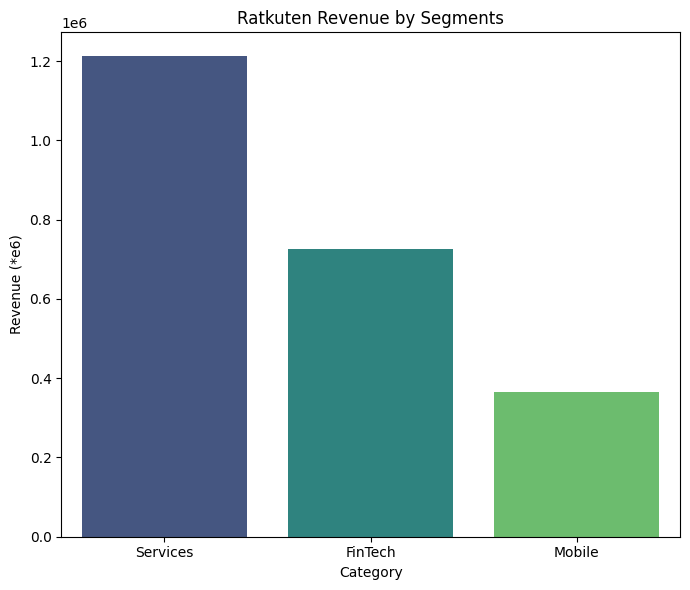

In [11]:
df = Rakuten_data.T.reset_index()
df.columns = ["Category", "Sales"]
plt.figure(figsize=(7, 6))
sns.barplot(data = df, x = "Category", y = "Sales", hue = "Category",  palette = "viridis")
plt.title("Ratkuten Revenue by Segments")
plt.ylabel("Revenue (*e6)")
plt.xlabel("Category")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### セグメント分類について
**参照**
<br>https://corp.rakuten.co.jp/investors/assets/doc/documents/23Q4tanshin_J.pdf
- インターネットサービス<br>
(a) インターネット・ショッピングモール(楽天市場)<br>
(b)楽天トラベル, ポータルサイト等のサービス<br>
(c)上記サイトの広告販売<br>
- フィンテック<br>
(a) クレジット関連サービス<br>
(b) インターネットバンキング&証券<br>
(c) 保険等金融商品の販売<br>
(d) 電子マネーサービス<br>
- モバイル<br>
通信サービス及び通信技術の提供並びに電力供給サービスの運営等を行う事業


In [14]:
# セグメント値の設定
seg1_value = Rakuten_data["Services"].iloc[0] * 1e6 # 単位 : 百万円
seg2_value = Rakuten_data["FinTech"].iloc[0] * 1e6
seg3_value = Rakuten_data["Mobile"].iloc[0] * 1e6

seg_list = [seg1_value, seg2_value, seg3_value]

# 専業企業リスト
Services = [
    "4689.T",  # Zホールディングス (Yahoo!ショッピング、広告販売)
    "6098.T",  # リクルート (Indeed、広告プラットフォーム)
    "2121.T",  # ミクシィ (モンスターストライク、広告収益)
    "2432.T",  # ディー・エヌ・エー (ゲーム、広告)
    "4385.T",  # メルカリ (フリマアプリ)
    "3994.T",  # マクロミル (マーケティングリサーチ)
    "4751.T",  # サイバーエージェント (広告プラットフォーム、AbemaTV)
    "3092.T"   # ZOZO (ECプラットフォーム)
]

FinTech = [
    "3769.T",  # GMOペイメントゲートウェイ(代行)
    "4051.T",  # GMOフィナンシャルゲート(QR決済端末)
    "4072.T",  # 電算システム(コンビニの収納代行・決済サービス)
    "4689.T",  # LINEヤフー
    "4015.T",  # ペイロール(決済クラウド)
    "2428.T",  # ウェルネット(QRコード決済、収納代行)
    "3623.T",  # ビリングシステム 
    "4385.T",  # メルカリ(メルペイ)
    "4477.T",  # BASE(ネットショップ作成、QRコード決済)
    "4449.T"   # ギフティ(電子ギフト決済)
    ]

Mobile = [
    "9432.T",  # NTT
    "9433.T",  # KDDI
    "9434.T",  # ソフトバンク
    "4755.T",  # 楽天G
    "9436.T",  # 沖縄セルラー
    "9416.T",  # ビジョン(おもにWi-Fi)
    "3696.T",  # セレス(モバイルサービス)
    "9437.T",  # NTTドコモ
    "9424.T"   # 日本通信(格安SIM)
    ]
specialized_tickers = [Services, FinTech, Mobile]

# DiversifyApproach
div_approach = DiversifyApproach(
    ticker = "4755.T", # 楽天グループ
    specialized_tickers = specialized_tickers,
    data = Rakuten_data
)

# ソフトバンクグループの企業価値の計算
value = div_approach.calculate_value()
print(f"企業価値: {value}")

# EXVAL（超過価値）の計算
exval = div_approach.calculate_exval(seg_list)
print(f"超過価値 (EXVAL): {exval}")

企業価値: 6908845970240.0
超過価値 (EXVAL): 0.42522563453458945


## 結果
[ソフトバンク]

Consumer   Enterprise   Distribution   Media   Finance

企業価値: 34814635080128.0<br>
超過価値 (EXVAL): 1.7976939736606807

[楽天]

Services   FinTech   Mobile

企業価値: 6908845970240.0<br>
超過価値 (EXVAL): 0.42522563453458945




1. 企業価値<br>
<br>
[ソフトバンク]<br>約34.81兆円<br><br>
[楽天]<br>約6.91兆円<br><br>
ソフトバンクの企業価値　(34.81兆円)は, 楽天(6.91兆円)のおよそ5倍であり, 企業規模の視点では, 楽天に比べソフトバンクが大きく上回っている.
<br>
2社の違いとしては, 
- ソフトバンクは主に通信事業. 他にもメディア・広告やECといった他分野事業も展開している.
- 楽天はEC, フィンテック, モバイル事業の複数分野を展開している. モバイル事業は売上高として低くなっており, 収益を得ることができていない?

<br>

2. 超過価値(EXVAL)<br>
超過価値においてもソフトバンクのほうが大きく上回っている.<br>
ソフトバンクの超過価値より, 各事業を専業と仮定すると, それぞれの事業水準を大きく超える価値を生み出すことができている.<br>
一方で楽天は複数事業を展開しているが, それぞれで専門性を発揮できていおらず, 各事業の水準よりも下回っている. 
3. 結論<br>
[ソフトバンク]<br>
メインとする通信事業に限らず, メディア事業やEC事業の売上も高い.<br>
各事業は水準以上の収益を得ており, 高い超過価値を生み出している.
[楽天]
ECやフィンテック, モバイルなど多くの領域を持つが, モバイル事業の収益が進んでいないようにみえる.
<br>
QR決済において, 楽天PAYはシェア第2位の23%(1位 : PayPay 51%)を占めているにも関わらず, なぜフィンテック領域が伸びていないのかが疑問である.
<br>


[株式会社インフキュリオン​「決済動向2024年上期調査」](https://squareup.com/jp/ja/townsquare/market-share-of-qr-code-payment#:~:text=%E5%90%84QR%E3%82%B3%E3%83%BC%E3%83%89%E6%B1%BA%E6%B8%88%E3%82%B5%E3%83%BC%E3%83%93%E3%82%B9%E3%81%AE%E2%80%8B%E3%82%B7%E3%82%A7%E3%82%A2%E7%8E%87,-%E6%A0%AA%E5%BC%8F%E4%BC%9A%E7%A4%BE%E3%82%A4%E3%83%B3%E3%83%95&text=%E3%81%AA%E3%81%A3%E3%81%A6%E3%81%84%E3%81%BE%E3%81%99%E3%80%82-,%E2%80%8B%E4%BB%96%E3%81%AE%E2%80%8BQR%E3%82%B3%E3%83%BC%E3%83%89%E6%B1%BA%E6%B8%88%E3%82%B5%E3%83%BC%E3%83%93%E3%82%B9%E3%82%92%E2%80%8B,%E3%81%8C%E2%80%8B6%25%E3%81%A7%E3%81%97%E3%81%9F%E3%80%82)
<br>
